In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load your dataset (assuming it's in a CSV file)
# For example:
data = pd.read_csv('/content/Housing.csv')

# Explore the dataset
data.head(100)

# data.info()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000  7420         4          2        3      yes        no       no   
1   12250000  8960         4          4        4      yes        no       no   
2   12250000  9960         3          2        2      yes        no      yes   
3   12215000  7500         4          2        2      yes        no      yes   
4   11410000  7420         4          1        2      yes       yes      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
95   6300000  4100         3          2        3      yes        no       no   
96   6300000  9000         3          1        1      yes        no      yes   
97   6300000  6400         3          1        1      yes       yes      yes   
98   6293000  6600         3          2        3      yes        no       no   
99   6265000  6000         4          1        3      yes       yes      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
0               no             yes        2      yes        furnished  
1               no             yes        3       no        furnished  
2               no              no        2      yes   semi-furnished  
3               no             yes        3      yes        furnished  
4               no             yes        2       no        furnished  
..             ...             ...      ...      ...              ...  
95              no             yes        2       no   semi-furnished  
96              no              no        1      yes        furnished  
97              no             yes        1      yes   semi-furnished  
98              no             yes        0      yes      unfurnished  
99              no              no        0      yes      unfurnished  

[100 rows x 13 columns]

In [ ]:
data = data.drop(data.columns[-1], axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
# Convert 'yes' to 1 and everything else to 0 for every column in the dataset
data = data.applymap(lambda x: 1 if str(x).lower() == 'yes' else 0)

In [ ]:
data.head(10)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0      0     0         0          0        0         1          0         0   
1      0     0         0          0        0         1          0         0   
2      0     0         0          0        0         1          0         1   
3      0     0         0          0        0         1          0         1   
4      0     0         0          0        0         1          1         1   
5      0     0         0          0        0         1          0         1   
6      0     0         0          0        0         1          0         0   
7      0     0         0          0        0         1          0         0   
8      0     0         0          0        0         1          1         1   
9      0     0         0          0        0         1          1         0   

   hotwaterheating  airconditioning  parking  prefarea  
0                0                1        0         1  
1                0                1        0         0  
2                0                0        0         1  
3                0                1        0         1  
4                0                1        0         0  
5                0                1        0         1  
6                0                1        0         1  
7                0                0        0         0  
8                0                1        0         1  
9                0                1        0         1

In [ ]:


# Assuming the first column is the target column (house prices) and the rest are feature columns
features = data.drop(data.columns[0], axis=1)  # Exclude the first column as it's the target
target = data[data.columns[0]]  # Take the first column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.00
R-squared Score: 1.00


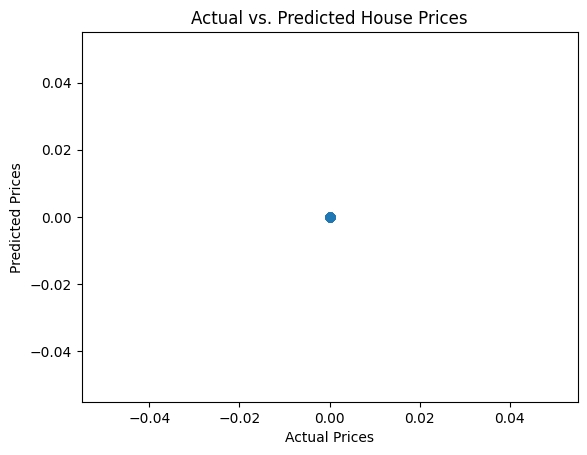

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()



In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 316 to 155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             109 non-null    int64
 1   bedrooms         109 non-null    int64
 2   bathrooms        109 non-null    int64
 3   stories          109 non-null    int64
 4   mainroad         109 non-null    int64
 5   guestroom        109 non-null    int64
 6   basement         109 non-null    int64
 7   hotwaterheating  109 non-null    int64
 8   airconditioning  109 non-null    int64
 9   parking          109 non-null    int64
 10  prefarea         109 non-null    int64
dtypes: int64(11)
memory usage: 10.2 KB
